In [1]:
import Pkg
Pkg.activate("..")

  Activating project at `~/unsupervised_aav2`


In [2]:
using JLD2, PyPlot, GaussianMixtures, BioSeqInt, Flux, Distributions

In [5]:
include("utils.jl")

binomial_threshold (generic function with 1 method)

# Data

sequences with counts < 100 are filtered out

In [8]:
file_experiment1 = load("../my_data/data_experiment1.jld2")
sequences_experiment1 = file_experiment1["sequences_experiment1"]
counts_experiment1 = file_experiment1["counts_experiment1"];

In [9]:
file_experiment2 = load("../my_data/data_experiment2.jld2")
sequences_experiment2 = file_experiment2["sequences_experiment2"]
counts_experiment2 = file_experiment2["counts_experiment2"];

In [11]:
file_experiment3 = load("../my_data/data_experiment3.jld2")
sequences_experiment3 = file_experiment3["sequences_experiment3"]
counts_experiment3 = file_experiment3["counts_experiment3"];

In [6]:
sequences_experiment1, counts_experiment1, labels_experiment1 = 
    load_data_cnn("../my_data/data_experiment1.jld2", threshold_experiment1, "experiment1");

LoadError: UndefVarError: threshold_experiment1 not defined

In [ ]:
sequences_experiment2, counts_experiment2, labels_experiment2 = 
    load_data_cnn("../my_data/data_experiment2.jld2",threshold_experiment2, "experiment2");

In [ ]:
sequences_experiment3, counts_experiment3, labels_experiment3 = 
    load_data_cnn("../my_data/data_experiment3.jld2", threshold_experiment3, "experiment3");

# log selectivities

In [13]:
θexperiment1 = [log(counts_experiment1[m,2] / counts_experiment1[m,1]) for m in axes(counts_experiment1, 1)];

In [14]:
θexperiment2 = [log(counts_experiment2[m,2] / counts_experiment2[m,1]) for m in axes(counts_experiment2, 1)];

In [15]:
θexperiment3 = [log(counts_experiment3[m,2] / counts_experiment3[m,1]) for m in axes(counts_experiment3, 1)];

In [18]:
θexperiment1 = filter(isfinite, θexperiment1);
θexperiment2 = filter(isfinite, θexperiment2)
θexperiment3 = filter(isfinite, θexperiment3);

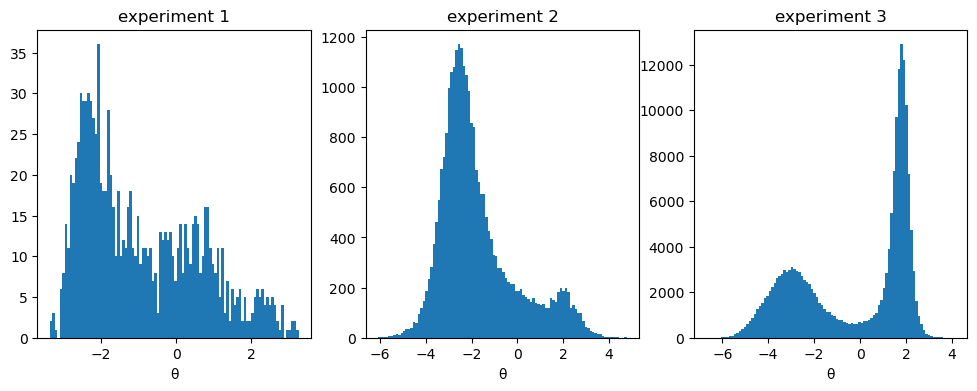

PyObject Text(0.5, 1.0, 'experiment 3')

In [19]:
fig, ax = subplots(1,3, figsize=(12,4))

ax[1].hist(filter(isfinite, θexperiment1), bins=100)
ax[1].set_xlabel("θ")
ax[1].set_title("experiment 1")

ax[2].hist(filter(isfinite, θexperiment2), bins=100)
ax[2].set_xlabel("θ")
ax[2].set_title("experiment 2")

ax[3].hist(filter(isfinite, θexperiment3), bins=100)
ax[3].set_xlabel("θ")
ax[3].set_title("experiment 3")

# thresholds fit

In [42]:
gmm1 = GMM(2,1)
gmm1.μ .+= randn(2,1)
gmm1.Σ .*= 1e-1;

In [43]:
em!(gmm1, reshape(θexperiment1, :, 1); nIter=20)

20-element Vector{Float64}:
 -5.5785729497371985
 -1.7393478290325333
 -1.7287123775877122
 -1.7215919356387932
 -1.715336550445969
 -1.7098826206502054
 -1.7052375262758042
 -1.7013398863258256
 -1.6980900738116198
 -1.6953833211262432
 -1.693126111882989
 -1.6912406164567815
 -1.6896637281983204
 -1.6883444787715558
 -1.6872414128749107
 -1.686320418751142
 -1.6855530787666795
 -1.684915462129553
 -1.6843872529396768
 -1.6839511172448665

In [44]:
gmm2 = GMM(2,1)
gmm2.μ .+= randn(2,1)
gmm2.Σ .*= 1e-1;

In [45]:
em!(gmm2, reshape(θexperiment2, :, 1), nIter=20)

20-element Vector{Float64}:
 -26.28061356026236
  -1.7701626057196367
  -1.7680312750254539
  -1.7665091561875046
  -1.765312126182124
  -1.764367299874703
  -1.7636190198845083
  -1.763023667327009
  -1.7625475001523292
  -1.7621645467997507
  -1.761854830130038
  -1.761602956324744
  -1.7613970231204004
  -1.7612277868847457
  -1.7610880318873472
  -1.7609720942271956
  -1.760875502615723
  -1.7607947068695093
  -1.7607268720520057
  -1.7606697217458247

In [46]:
gmm3 = GMM(2,1)
gmm3.μ .+= randn(2,1)
gmm3.Σ .*= 1e-1;

In [47]:
em!(gmm3, reshape(θexperiment3, :, 1), nIter=20)

20-element Vector{Float64}:
 -19.494446778999688
  -1.7335306105626243
  -1.7244812083493704
  -1.7209121849833462
  -1.7195078143182225
  -1.71893963812937
  -1.7187033825130424
  -1.7186033103282816
  -1.7185604141887871
  -1.7185418829622605
  -1.7185338360894482
  -1.7185303298838888
  -1.7185287986651099
  -1.7185281289421062
  -1.7185278357242653
  -1.7185277072619352
  -1.7185276509560612
  -1.7185276262695768
  -1.718527615444041
  -1.7185276106962062

In [31]:
function eval_gmm(gmm, x)
    g1 = Normal(gmm.μ[1,1], gmm.Σ[1,1])
    g2 = Normal(gmm.μ[2,1], gmm.Σ[2,1])
    g = MixtureModel([g1, g2], gmm.w)
    return pdf.(g, x)
end

eval_gmm (generic function with 1 method)

In [32]:
x1 = LinRange(-3,3,100)
x2 = LinRange(-7,5,100)
x3 = LinRange(-7,5,100);

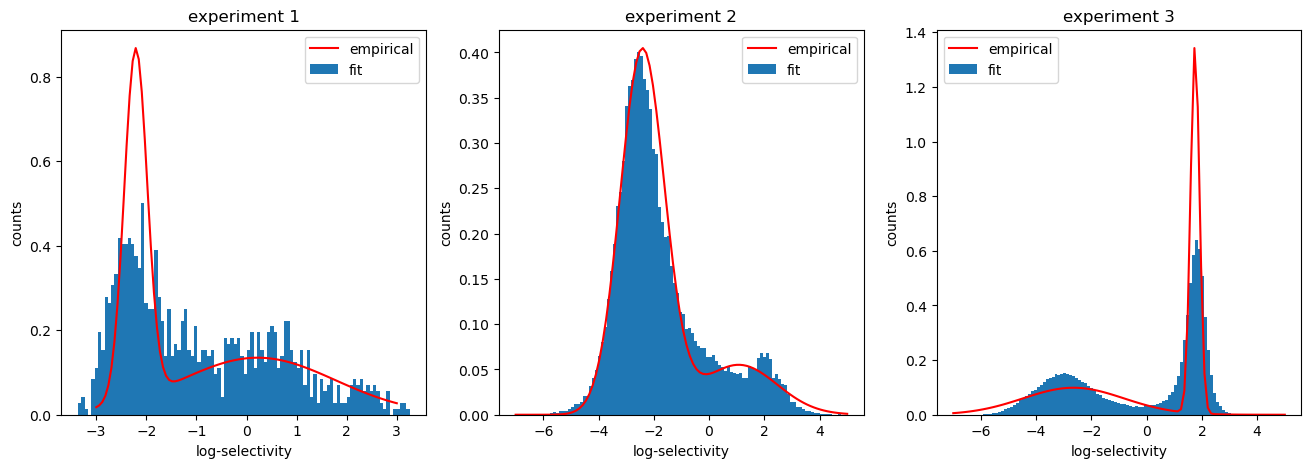

PyObject Text(0.5, 1.0, 'experiment 3')

In [33]:
fig, ax = subplots(1,3, figsize=(16,5))

ax[1].hist(θexperiment1, bins=100, density=true)
ax[1].plot(x1, eval_gmm(gmm1, x1), color="red")
ax[1].set_xlabel("log-selectivity")
ax[1].set_ylabel("counts")
ax[1].legend(["empirical", "fit"])
ax[1].set_title("experiment 1")

ax[2].hist(θexperiment2, bins=100, density=true)
ax[2].plot(x2, eval_gmm(gmm2, x2), color="red")
ax[2].set_xlabel("log-selectivity")
ax[2].set_ylabel("counts")
ax[2].legend(["empirical", "fit"])
ax[2].set_title("experiment 2")

ax[3].hist(θexperiment3, bins=100, density=true)
ax[3].plot(x3, eval_gmm(gmm3, x3), color="red")
ax[3].set_xlabel("log-selectivity")
ax[3].set_ylabel("counts")
ax[3].legend(["empirical", "fit"])
ax[3].set_title("experiment 3")

In [34]:
function intersections(gmm)
    m1 = gmm.μ[1,1]
    m2 = gmm.μ[2,1]
    s1 = gmm.Σ[1,1]
    s2 = gmm.Σ[2,1]
    w1 = gmm.w[1]
    w2 = gmm.w[2]
    
    a = s2^2 - s1^2
    b = m1*s2^2 - m2*s1^2
    c = m1^2*s2^2 - m2^2*s1^2 + 2*s1^2*s2^2*log((w2/w1)*(s1/s2))
    
    x1 = (b + sqrt(b^2-a*c))/a
    x2 = (b - sqrt(b^2-a*c))/a
    
    return x1,x2
end

intersections (generic function with 1 method)

In [35]:
xa_1,xb_1 =intersections(gmm1)

(-2.83999763891293, -1.69282578656425)

In [36]:
xa_2,xb_2 =intersections(gmm2)

(-0.5563637456633788, -7.768752589704916)

In [37]:
xa_3,xb_3 =intersections(gmm3)

(1.2436155750213542, 2.3263527824460075)

In [38]:
function find_valley(gmm, resolution::Int)
    xmin = gmm.μ[1,1]
    xmax = gmm.μ[2,1]
    r = LinRange(xmin, xmax, resolution)
    y = eval_gmm(gmm, r)
    xvalley = argmin(y)
    return r[xvalley]
end

find_valley (generic function with 1 method)

In [48]:
find_valley(gmm1, 100)

-1.4518378956532874

In [49]:
find_valley(gmm2, 100)

-0.13876055539502508

In [50]:
find_valley(gmm3, 100)

1.128013082938827